## EJERCICIO DE FLUJO DE CAJA DESCOCOTANDO

In [1]:
#Importando libreria creada para el análisis del riesgo
from Libreria.simulator import *

In [2]:
def varibles_entrada():
    return {"costo_inversion":np.random.triangular(750000,780000,800000),
            "ingreso_ano_1":np.random.triangular(400000,500000,600000),
            "costo_fijo_anual":np.random.uniform(150000,250000),
            "tasa_crecimiento_anual":np.random.normal(loc=0.05,scale=0.07),
            "porcentaje_anual_costos":np.random.normal(loc=0.40,scale=0.02)}

In [3]:
def flujo_caja(costo_inversion,ingreso_ano_1,costo_fijo_anual,tasa_crecimiento_anual,porcentaje_anual_costos):

    list_ingreso = []
    list_Costovariable = []
    list_Flujodecaja = []
    for i in range(1,11):
        if i == 1:
          list_ingreso.append(ingreso_ano_1)
          list_Costovariable.append(ingreso_ano_1*(-porcentaje_anual_costos))
          list_Flujodecaja.append(ingreso_ano_1 + (-1*costo_fijo_anual) + (ingreso_ano_1*(-porcentaje_anual_costos)))
        else:
            list_ingreso.append(list_ingreso[i - 2] * (1 + tasa_crecimiento_anual))
            list_Costovariable.append(list_ingreso[i - 1] * (-porcentaje_anual_costos))
            list_Flujodecaja.append(list_ingreso[i - 1] + (-1 * costo_fijo_anual) + list_Costovariable[i - 1])

    factor = [0.15 ** i for i in range(1, 11)]
    VPN = -costo_inversion + sum([valor / tasa for tasa, valor in zip(factor, list_Flujodecaja)])
    TIR = -costo_inversion + sum([valor for valor in list_Flujodecaja])
    return {"VPN":VPN,"TIR":TIR}

In [18]:
# LLamado de la función creada para verificar que en efecto se obtengan los resultados esperados. 
flujo_caja(**varibles_entrada())

{'VPN': 37150797261054.81, 'TIR': 878870.5428862455}

In [20]:
# Se instancia la clase con los parametros necesarios para provocar el incio de la simulación.
s1=Simulator(2,2000,flujo_caja,varibles_entrada,0.95)

In [21]:
# Se ejecuta el proceso de simulación, acá solo se hace la ejecución si el usuario dese obtener los resultados
# debe hacer uso de otro método.
s1.run_simulation()

In [22]:
# Método con el cual se pueden obtener los resultados de la simulación ejecutada.
s1.get_simulations()

,simulacion,iteracion,VPN,TIR
0,0,0,5.505700e+13,9.487417e+05
1,0,1,2.575517e+13,7.390458e+04
2,0,2,5.041015e+12,-5.804775e+03
3,0,3,1.321531e+14,2.344179e+06
4,0,4,7.720505e+13,1.490363e+06
...,...,...,...,...
3995,1,1995,6.502586e+13,1.248630e+06
3996,1,1996,1.006571e+14,2.202949e+06
3997,1,1997,9.433435e+13,2.007919e+06
3998,1,1998,2.427731e+13,9.508609e+04


In [23]:
# Tabla de resumen donde se puede observar el comportamiento de las simulaciones en función de los estadísticos 
# descriptivos que generan más información acerca de un conjunto de datos.
s1.summary_table()

,simulacion,variable,Mínimo,Máximo,Media,Desviación est,Varianza,Asimetría,Curtosis,Moda,Mediana,IC,Q1,Q2,Q3,IQR
0,0,TIR,-1.898574e+06,1.200999e+07,1.275192e+06,1.569018e+06,2.461818e+12,1.405313,3.628833,-1.898574e+06,9.998256e+05,"(1206386.2968720687, 1343997.5851070876)",1.957178e+05,9.998256e+05,2.022266e+06,1.826548e+06
1,0,VPN,-3.921848e+13,6.887068e+14,7.074041e+13,7.502727e+13,5.629091e+27,2.111961,7.673250,-3.921848e+13,5.252591e+13,"(67450260807721.5, 74030554491653.22)",2.065550e+13,5.252591e+13,9.908289e+13,7.842738e+13
2,1,TIR,-1.907383e+06,8.899558e+06,1.264710e+06,1.430266e+06,2.045661e+12,1.081093,1.814193,-1.907383e+06,1.043567e+06,"(1201989.5017187744, 1327431.493704924)",2.452065e+05,1.043567e+06,1.994597e+06,1.749391e+06
3,1,VPN,-4.038284e+13,5.037809e+14,6.986028e+13,6.730182e+13,4.529534e+27,1.586432,3.689364,-4.038284e+13,5.506581e+13,"(66908912529007.03, 72811642294851.69)",2.252444e+13,5.506581e+13,1.000232e+14,7.749871e+13


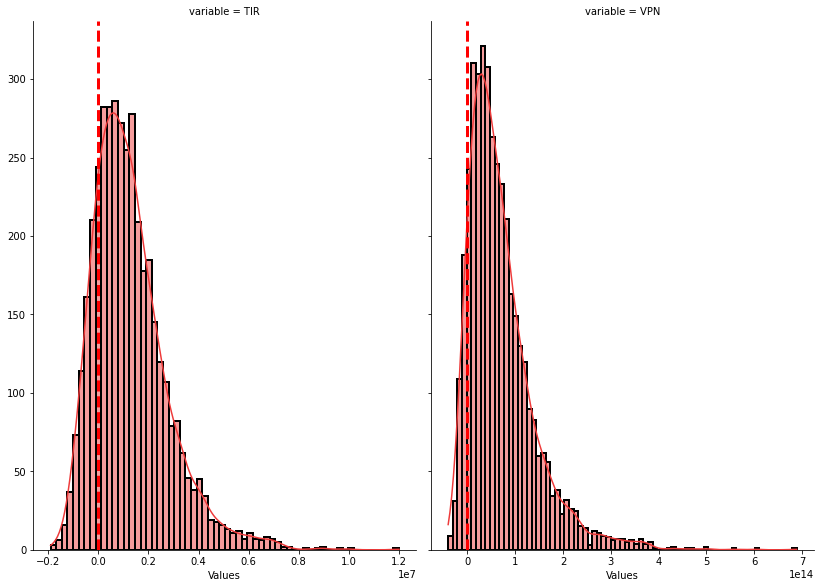

In [24]:
# Método que genera las gráficas en las cuales se puede ver el comportamiento de las variables simuladas.
# El usuario puedo hacer uso de atributos que puedan mejorar el aspecto visual de estas.
s1.histogram(kde=True, color='#EE3B3B',lw=2)

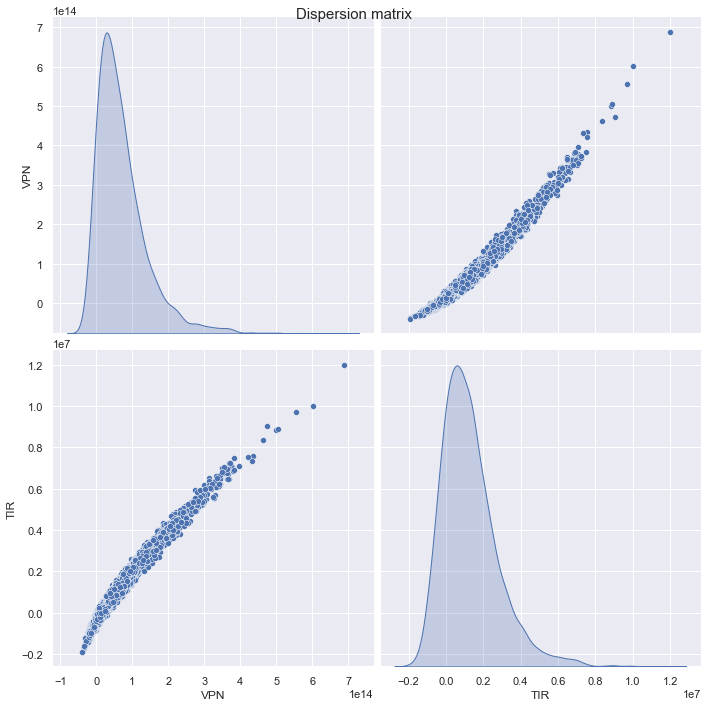

In [25]:
# Método que permite graficar la dispersión de las variables simuladas.
s1.plot_matrix(plot_type='pairplot',columns=False,method='pearson')

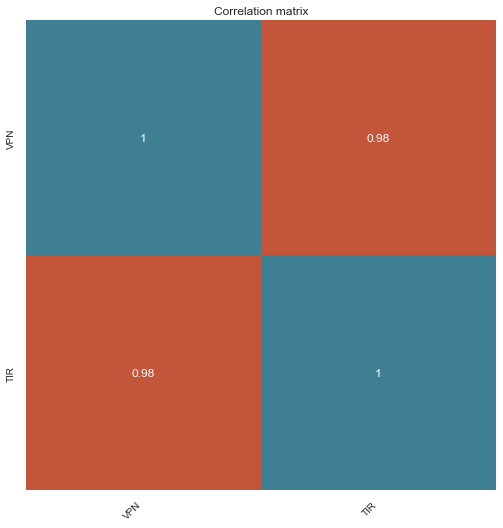

In [26]:
# Método que permite graficar la correlación de las variables simuladas mediante los diferentes métodos de cálculo de esta.
s1.plot_matrix(plot_type='corr_plot',columns=False,method='pearson')